In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [28]:
# Read colors data
colors_ref = pd.read_csv("/Users/berg/DataspellProjects/MDSA-UofC/DATA605/04_datathon/colors_processed_v21.csv")

In [29]:
# Calculate 'Decade'
colors_ref['Decade_first'] = colors_ref['First.Year'].apply(lambda x: int(x/10)*10)
# What colors are in each decade
lego_colors_by_decade_first = colors_ref.groupby('Decade_first')['name'].value_counts()

In [30]:
# Make a plot with 'Decade' on y-axis and 'Color' on x-axis
# and color them in respective colors from colors_ref
lego_colors_by_decade_first_unstack = lego_colors_by_decade_first.unstack()

In [31]:
# Calculate 'Decade'
colors_ref['Decade_last'] = colors_ref['Last.Year'].apply(lambda x: int(x/10)*10)
# What colors are in each decade
lego_colors_by_decade_last = colors_ref.groupby('Decade_last')['name'].value_counts()
# Make a plot with 'Decade' on y-axis and 'Color' on x-axis
# and color them in respective colors from colors_ref
lego_colors_by_decade_last_unstack = lego_colors_by_decade_last.unstack()

In [32]:
# Combine two dataframes
lego_colors_by_decade = lego_colors_by_decade_first_unstack.add(lego_colors_by_decade_last_unstack, fill_value=0)
# Reset index
lego_colors_by_decade = lego_colors_by_decade.reset_index()

In [33]:
# Fill NaN values with 1 between two non-NaN values by column and stop at first non-NaN value
# Iterate over columns

for col in lego_colors_by_decade.columns:
    non_nan_indices = lego_colors_by_decade[col].dropna().index
    if len(non_nan_indices) <= 1:
        continue
    for i in range(1, len(non_nan_indices)):
        start, end = non_nan_indices[i-1], non_nan_indices[i]
        lego_colors_by_decade[col].iloc[start+1:end] = 1


/var/folders/8d/k2jtdlbx31x9g2jjt17tx06h0000gn/T/ipykernel_18884/1186898312.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lego_colors_by_decade[col].iloc[start+1:end] = 1


In [34]:
# Set column 'index' as index and drop it
lego_colors_by_decade = lego_colors_by_decade.set_index('index')
# Fill rest of nan values with 0
lego_colors_by_decade = lego_colors_by_decade.fillna(0)
# If there are any values that are not 0 or 1, set them to 1
lego_colors_by_decade = lego_colors_by_decade.applymap(lambda x: 1 if x != 0 else 0)
# Reset index and drop old index
lego_colors_by_decade = lego_colors_by_decade.reset_index()
# Drop column index
lego_colors_by_decade = lego_colors_by_decade.drop(columns=['index'])

In [35]:
# Transpose dataframe
lego_colors_by_decade = lego_colors_by_decade.T
# Add 'r', 'g', 'b' columns to lego_colors_by_decade
lego_colors_by_decade = lego_colors_by_decade.merge(colors_ref[['name', 'r', 'g', 'b']], left_index=True, right_on='name')

In [36]:
import colorsys

# Use the same function from colorsys to sort the colors in colors_ref dataframe
lego_colors_by_decade['hls'] = lego_colors_by_decade.apply(lambda row: colorsys.rgb_to_hls(row['r']/255, row['g']/255, row['b']/255), axis=1)
# Sort colors_ref by 'hls' column
lego_colors_by_decade = lego_colors_by_decade.sort_values(by=['hls'])
# Reset index
lego_colors_by_decade = lego_colors_by_decade.reset_index(drop=True)

In [37]:
# Drop 'r', 'g', 'b', 'hls' columns
lego_colors_by_decade = lego_colors_by_decade.drop(columns=['r', 'g', 'b', 'hls'])
# Set column 'name' as index and drop it
lego_colors_by_decade = lego_colors_by_decade.set_index('name')
# Transpose dataframe
lego_colors_by_decade = lego_colors_by_decade.T

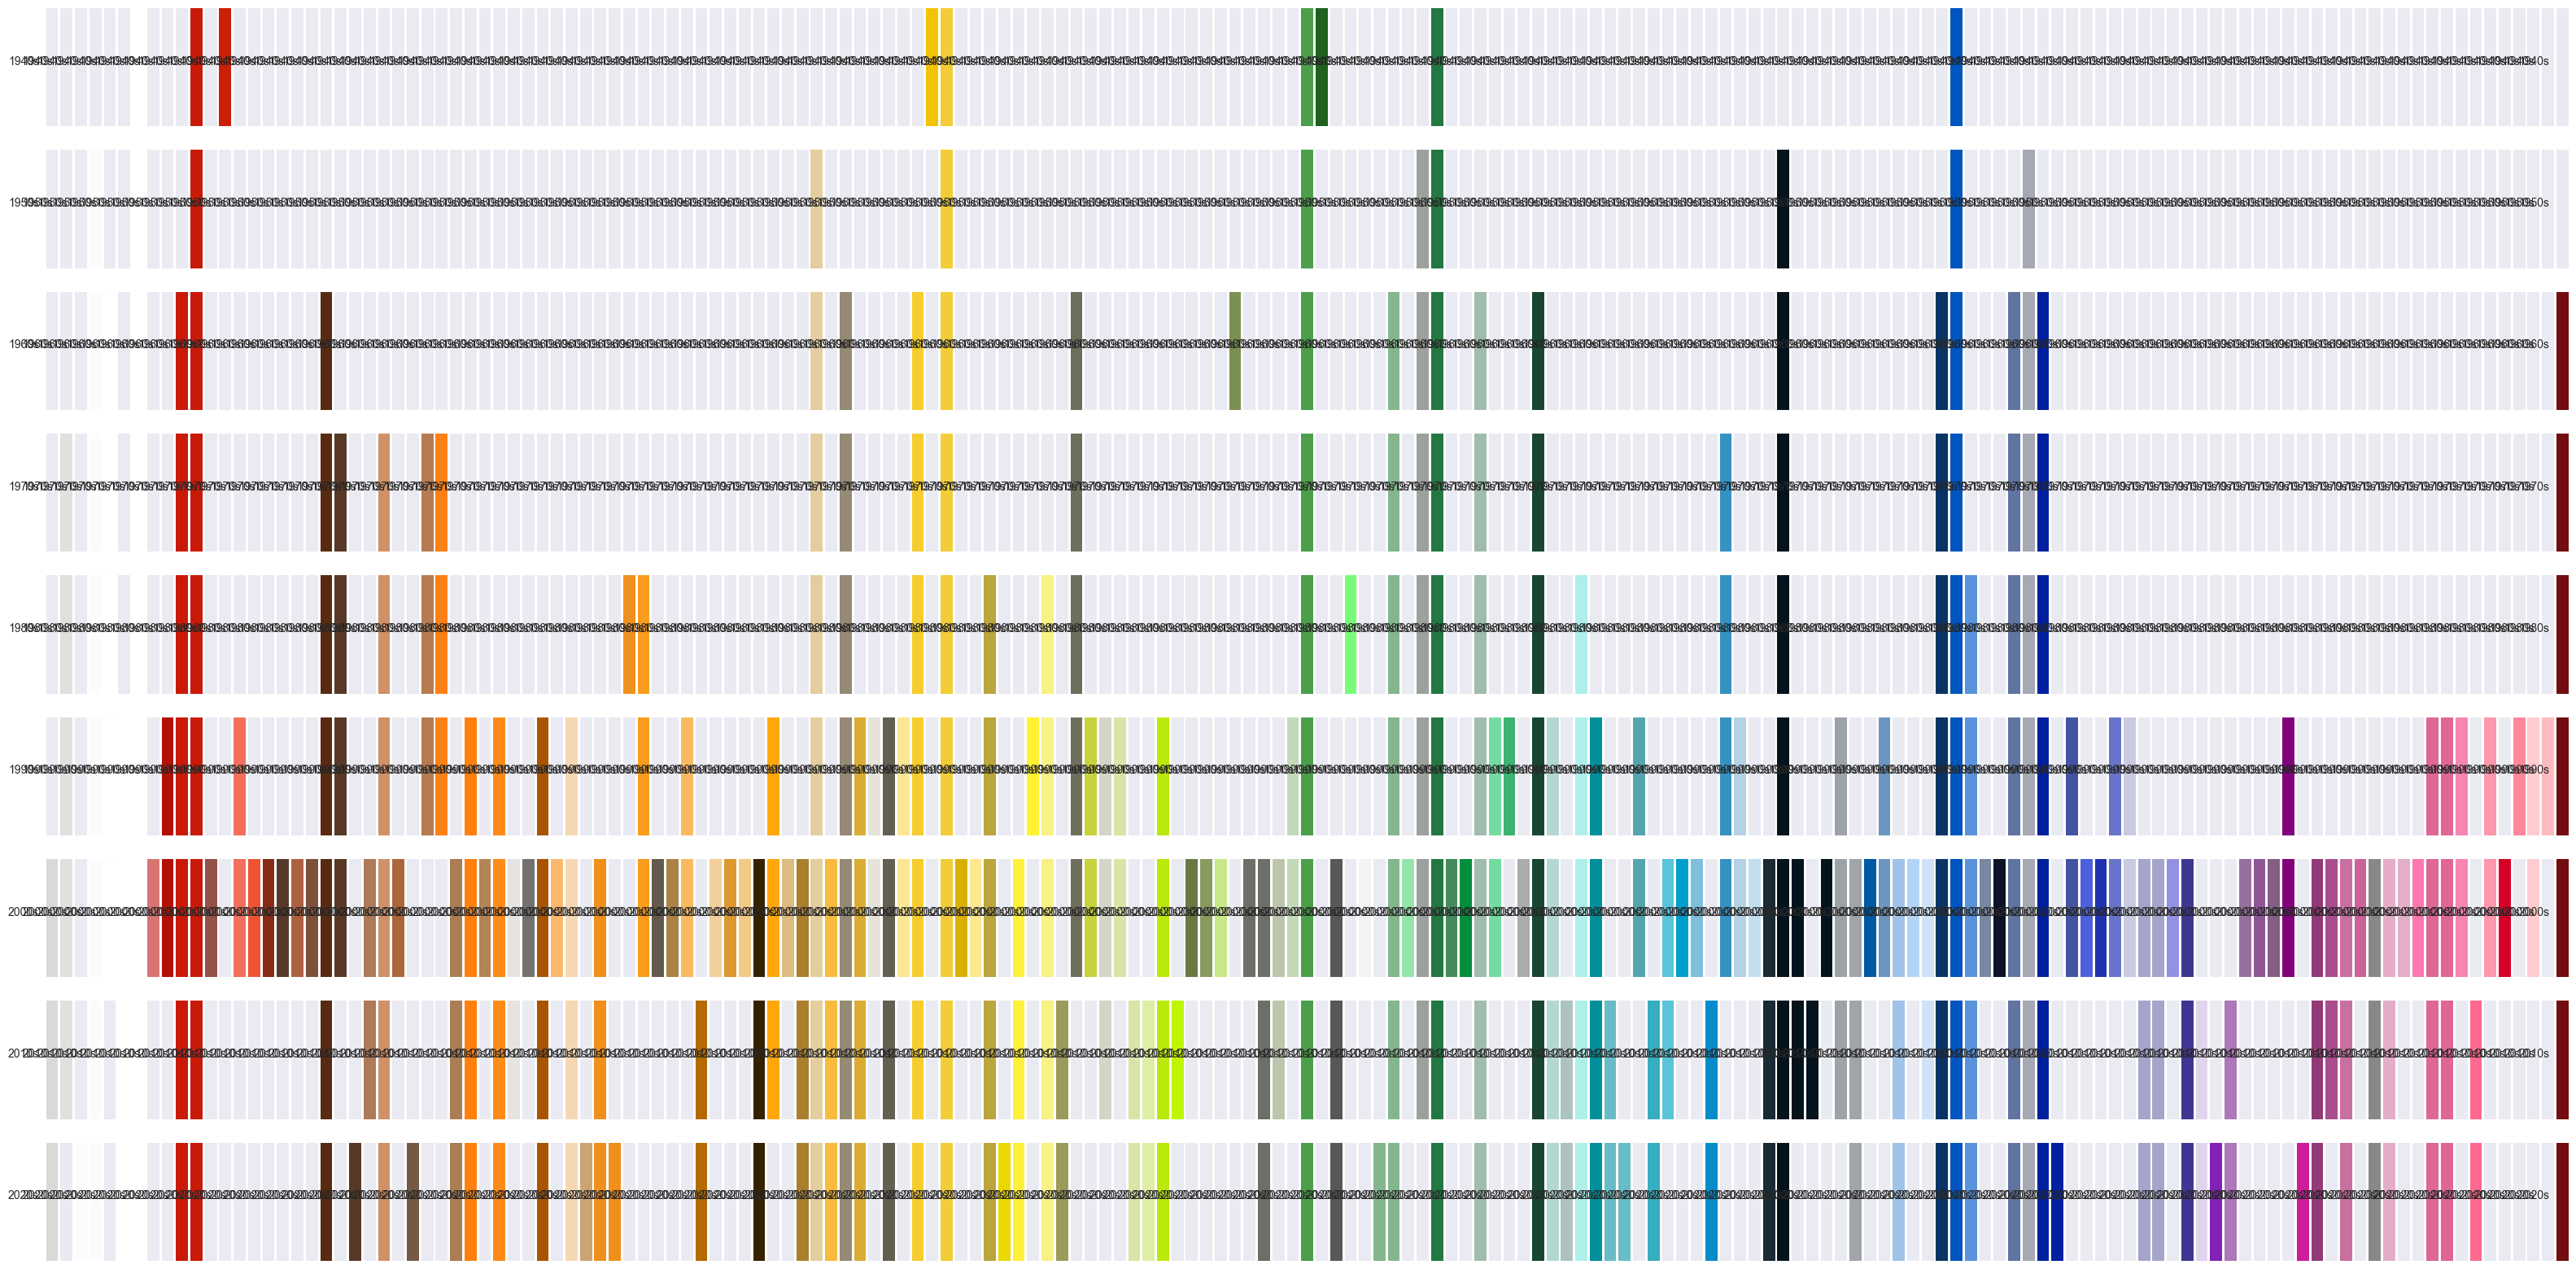

In [44]:
decades = ['1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
# Make a figure with nrows equal to number of rows in lego_colors_by_decade and ncols equal to number of columns in lego_colors_by_decade
fig, axes = plt.subplots(nrows=lego_colors_by_decade.shape[0], ncols=lego_colors_by_decade.shape[1], figsize=(40, 20))
# Iterate over rows
for i, row in lego_colors_by_decade.iterrows():
    # Iterate over columns
    for j, col in enumerate(row):
        # If value is 1, plot a rectangle with color from colors_ref
        if col == 1:
            axes[i, j].add_patch(plt.Rectangle((0, 0), 1, 1, color=colors_ref[colors_ref['name'] == lego_colors_by_decade.columns[j]]['hex'].values[0]))
        # Remove x and y ticks
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        # Remove x and y labels
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')
        # Remove spines
        axes[i, j].spines['top'].set_visible(False)
        axes[i, j].spines['right'].set_visible(False)
        axes[i, j].spines['bottom'].set_visible(False)
        axes[i, j].spines['left'].set_visible(False)
        # Assign decade from decades list to y-axis label
        axes[i, j].set_ylabel(decades[i], rotation=0)
